# Water Quality Analysis


## Михаела Коларова, 2201321083, Софтуерно инженерство, 2 курс, 3а група


## Въведение

В този проект проучваме данни от файла water_potability.csv, който включва показатели за качеството на водата за 3276 различни водни обекта. Достъпът до безопасна питейна вода е от решаващо значение за здравето, основно човешко право и жизненоважен компонент на ефективните политики за опазване на здравето. Този въпрос е от значение на национално, регионално и местно равнище, като са документирани икономически ползи в регионите, където инвестициите във водоснабдяване и канализация надвишават свързаните с тях разходи за здравеопазване.

## Съдържание

Файлът water_potability.csv включва следните показатели за качеството на водата:

* Стойност на pH:
Оценява киселинно-алкалния баланс на водата, като текущите стойности варират от 6,52 до 6,83 в рамките на стандартите на СЗО (6,5-8,5).

* Твърдост:
Основно се дължи на калциеви и магнезиеви соли, които влияят върху способността на водата да утаява сапун.

* Твърди вещества (общо разтворени твърди вещества - TDS):
Високите стойности на TDS означават силно минерализирана вода, като се отчита способността на водата да разтваря неорганични и някои органични минерали. СЗО препоръчва желаната граница от 500 mg/l и максималната граница от 1000 mg/l за питейни цели.

* Хлорамини:
Основни дезинфектанти в обществените водоснабдителни системи, които обикновено се образуват при добавяне на амоняк към хлор. Нивата на хлорамина до 4 mg/l се считат за безопасни в питейната вода.

* Сулфати:
Естествено срещащи се вещества, които се намират в минералите, почвата и скалите, с различна концентрация в сладководните запаси. Търговската употреба на сулфати е широко разпространена в химическата промишленост.

* Проводимост:
Чистата вода е слаб проводник, но става по-проводима с увеличаване на концентрацията на йони. Стойностите на EC не трябва да надвишават 400 μS/cm според стандартите на СЗО.

* Органичен въглерод:
Общият органичен въглерод (ООВ) произхожда от разлагащата се органична материя. Американската агенция за опазване на околната среда (US EPA) препоръчва < 2 mg/L TOC в пречистената/питейната вода и < 4 mg/L в изходната вода, използвана за пречистване.

* Трихалометани:
Химикали, открити във водата, обработена с хлор, с безопасни нива до 80 ppm в питейната вода.

* Мътност:
Зависи от количеството на твърдите

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay,mean_squared_error, r2_score


# Получаване на данните

#### Прочитаме файла water_potability.csv чрез pandas и го задаваме в рамка от данни, наречена water_quality.


In [32]:
water_quality = pd.read_csv('water_potability.csv')

# Проверяваме информацията за water_potability

In [5]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Интересно е, че характеристиката "Potability" в набора от данни е цяло число, така че не се налага да я преобразуваме (от обект в цяло число за целите на нашето машинно обучение).

## След това можем да проверим първите пет реда на набора от данни

In [3]:
water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### След това ще използваме метода describe(), за да разкрием описателната статистика за набора от данни. 
### Това ще ни даде съществена статистическа информация за цифровите колони, представяйки подробности като средни стойности, стандартни отклонения и минимални и максимални стойности.







In [4]:
water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Предоставеният код проверява за наличие на нулеви стойности в набора от данни water_quality, като използва метода isnull().

In [6]:
water_quality.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [7]:
water_quality.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
missing_val_coll = ["ph", "Sulfate","Trihalomethanes"]

### Впоследствие кодът идентифицира конкретни колони с липсващи стойности, а именно "ph", "Sulfate" и "Trihalomethanes". За всяка колона, съдържаща липсващи стойности, той изчислява средната стойност и попълва липсващите записи с тази средна стойност. Това се постига чрез итеративен процес за всяка съответна колона.

In [9]:
for col in missing_val_coll:
    if water_quality[col].isnull().any():
        mean = water_quality[col].mean()
        water_quality[col].fillna(mean, inplace=True)

In [10]:
water_quality.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Накрая кодът показва актуално обобщение на състоянието на нулевите стойности в набора от данни след обработката на липсващите стойности. Методът isnull().sum() се използва за преброяване и представяне на броя на нулевите стойности във всяка колона.

# Проверка дали данните са балансирани

In [11]:
wq = water_quality

In [12]:
wq['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

#### За да определим дали данните са балансирани, можем да сравним броя на случаите. В този случай данните са небалансирани, тъй като броят на случаите в 0 значително надвишава броя на случаите в 1. Една балансирана съвкупност от данни би имала приблизително равен брой случаи за всеки клас.

#### В обобщение, наборът от данни е дисбалансиран по отношение на класовете "Potability".

# Проучвателен анализ на данните

Нека използваме matplotlib, за да направим задълбочено проучване на нашата съвкупност от данни. Първоначално ще се съсредоточим върху разпределението на стойностите на pH, като построим хистограма. В нашата конкретна съвкупност от данни разпределението на pH изглежда следва донякъде нормален модел, съсредоточен в диапазона от 6,5 до 7,0.

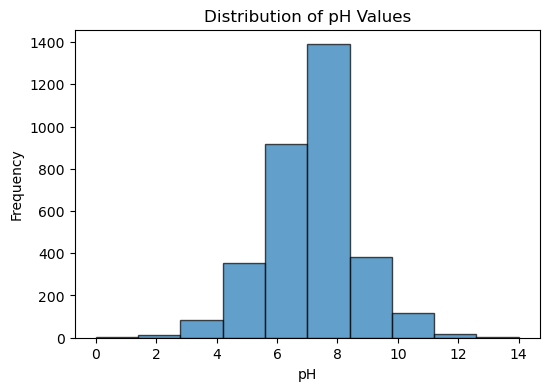

In [13]:
ph_values = wq['ph']
potability_labels = wq['Potability']

plt.figure(figsize=(6, 4))
plt.hist(ph_values, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

### Използвахме matplotlib, за да се запознаем с конкретни параметри. Фокусирайки се върху разпределението на концентрацията на разтворени твърди вещества, хистограмата разкрива прозрения за променливостта на този важен параметър в набора от данни. Визуализацията подчертава честотното разпределение на концентрацията на разтворени твърди вещества, като подпомага разбирането ни за нейното разпространение и разпределение в набора от данни за качеството на водата.

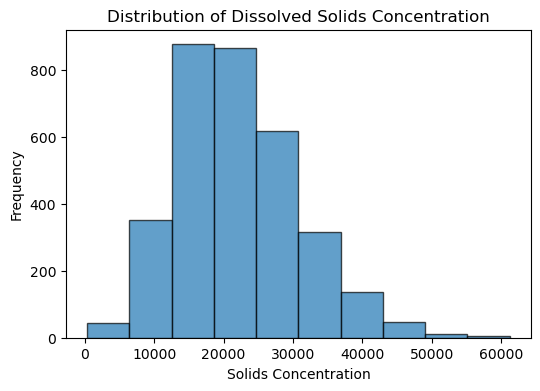

In [33]:
solids_values = wq['Solids']
potability_labels = wq['Potability']

plt.figure(figsize=(6, 4))
plt.hist(solids_values, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Dissolved Solids Concentration')
plt.xlabel('Solids Concentration')
plt.ylabel('Frequency')
plt.show()

# Разпределение на концентрацията на твърди вещества за питейна и непитейна вода

Хистограмата илюстрира разпределението на концентрацията на разтворени твърди вещества във водата, като се прави разграничение между питейни (зелено) и непитейни (жълто) случаи. Оста x представлява концентрацията на разтворените твърди вещества, а оста y показва броя на случаите.

Наблюдавайки хистограмата, можем да забележим вариациите в концентрацията на разтворени твърди вещества както за питейните, така и за непитейните водоизточници. Тази визуализация дава представа за различията в моделите на разпределение на разтворените твърди вещества, като подпомага изследването на потенциалните различия между класовете на водата за питейни нужди.

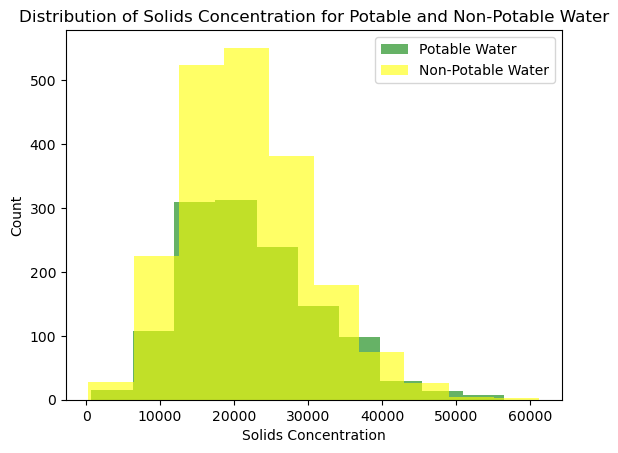

In [15]:
potable_filter = wq['Potability'] == 1
non_potable_filter = wq['Potability'] == 0

# Създаване на хистограма за концентрацията на разтворени твърди вещества
plt.hist(wq[potable_filter]['Solids'], alpha=0.6, color='green')
plt.hist(wq[non_potable_filter]['Solids'], alpha=0.6, color='yellow')

plt.xlabel('Solids Concentration')
plt.ylabel('Count')
plt.title('Distribution of Solids Concentration for Potable and Non-Potable Water')

plt.legend(['Potable Water', 'Non-Potable Water'])

plt.show()

# Разпределение на годността на водата

Кръговата диаграма представя ясно разпределението на питателността на водата в набора от данни. Случаите са категоризирани в два класа: "Не питейна" и "Питейна". Диаграмата осигурява визуално представяне на дела на всеки клас, като класът "Питейна" е представен в светло коралово, а класът "Не питейна" - в небесносиньо.

Наблюдавайки диаграмата, можем лесно да забележим относителното разпределение на случаите на питейна и непитейна вода, което помага да се разбере цялостното равновесие или дисбаланс между тези два класа в набора от данни.

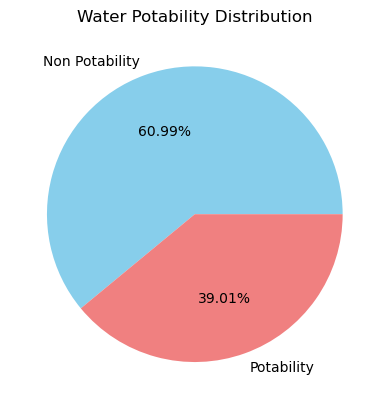

In [16]:
water_type_counts = wq.groupby('Potability').size()

# Промяна на индексите във water_type_counts
water_type_counts.index = ['Non Potability', 'Potability']

# Създаване на кръгова диаграма
plt.gca().set_aspect("equal")
plt.pie(water_type_counts, labels=water_type_counts.index, autopct="%.2f%%", colors=['skyblue', 'lightcoral'])
plt.title("Water Potability Distribution")
plt.show()

При анализа на набора от данни се вижда, че приблизително 61% от случаите са класифицирани като "Непитейна вода" (0), а по-малка част (приблизително 39%) са обозначени като "Питейна вода" (1).

Баланс на класовете:

Разпределението между "Непитейна вода" и "Питейна вода" не е равномерно, като по-голяма част от тях попадат в категорията "Непитейна вода". Наборът от данни показва дисбаланс между двата класа, което показва по-голям брой екземпляри, класифицирани като "Непитейна вода", в сравнение с "Питейна вода".

In [17]:
wq.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


Корелационната матрица отразява връзките между различните параметри в набора от данни за качеството на водата. Основните наблюдения включват липсата на силна линейна корелация между годността на водата и стойностите на рН, както и между годността на водата и твърдостта на водата. Това подчертава значението на използването на различни параметри за цялостна оценка на качеството на водата.

Въпреки че се забелязват някои слаби корелации между определени параметри, те обикновено са ограничени. Например слаба отрицателна корелация се наблюдава между твърдостта на водата и съдържанието на органичен въглерод, както и между мътността и съдържанието на органичен въглерод.

Тези наблюдения подчертават сложността на взаимодействията в системата за качество на водата и подчертават необходимостта от нюансиран подход при анализа на факторите, които оказват влияние върху годността на водата за пиене и цялостното ѝ качество.

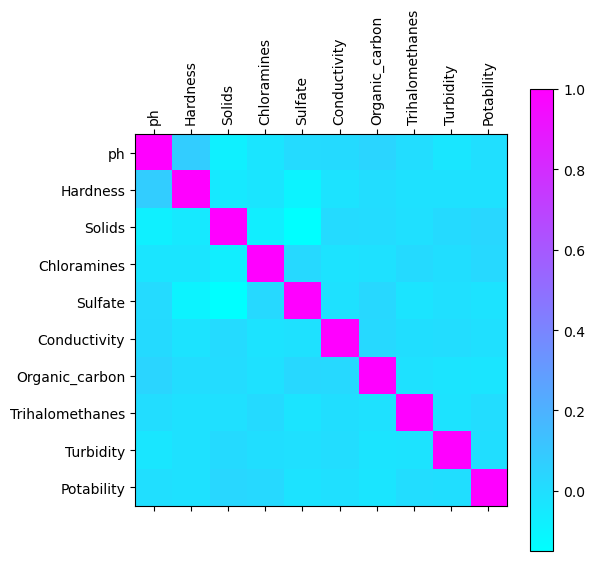

In [30]:
def plot_corr(dataframe, size=6):
    
    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='cool')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
    
plot_corr(wq)
plt.show()

Предоставената функция на Python, plot_corr, е предназначена за създаване и показване на топлинна карта на корелационната матрица за дадена DataFrame, като размерът по подразбиране е 6. Функцията използва метода corr, за да изчисли коефициентите на корелация между различните параметри в набора от данни.

При изпълнение на функцията се генерира фигура от Matplotlib, която показва топлинната карта на корелационната матрица. Цветовете в топлинната карта визуално представят силата и посоката на корелациите: по-студените тонове означават отрицателни корелации, а по-топлите - положителни корелации. Етикетите на осите x и y в топлинната карта съответстват на различните параметри в набора от данни.

In [31]:
corr = wq.corr()
corr.style.background_gradient(cmap='cool')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [20]:
# Изчисляваме корелациите
correlations = wq.corr()

# Намираме индексите на силно корелираните колони
highly_correlated = set()
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.8:
            colname = correlations.columns[i]
            highly_correlated.add(colname)

# Премахваме силно корелираните колони от DataFrame
wq_filtered = wq.drop(columns=highly_correlated)

In [21]:
wq_filtered.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [22]:
wq_filtered['Potability'].unique()

array([0, 1], dtype=int64)

In [23]:
wq_filtered.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [24]:
good_potability = wq['Potability'].mean()
print(good_potability)

0.3901098901098901


Изчислява средната стойност на колоната "Питателност" в рамката с данни wq, като се насочва по-специално към двоичната променлива, указваща дали водата е питейна или не (1 за питейна, 0 за непитейна). Резултатът се съхранява в променливата good_potability и представлява делът на екземплярите, обозначени като "Potable" в набора от данни.

In [25]:
Y = wq_filtered['Potability']

Извличаме колоната "Potability" от DataFrame wq_filtered и я присвоява на променлива Y. Това обикновено означава, че "Y" е целевата променлива, често използвана в контекста на машинното обучение или статистическото моделиране, където тя представлява променливата, която трябва да бъде предсказана.

In [39]:
scaler = StandardScaler()

# Извличане на функционалните променливи
X = wq_filtered.drop('Potability',axis=1)

# Подготовка и стандартизация на данните
scaler.fit(X)
X_standard = scaler.transform(X)

Включваме използването на StandardScaler от библиотеката scikit-learn за стандартизиране на характеристиките в набора от данни. Това е стъпка от предварителната обработка при машинното обучение, при която данните се трансформират така, че да имат средна стойност 0 и стандартно отклонение 1.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size=0.20,random_state=123)

Използва функцията train_test_split от scikit-learn, за да раздели стандартизирания набор от признаци (X_standard) и целевата променлива (Y) на набори за обучение и тестване. 

In [28]:
regresor = LogisticRegression(random_state=16)
regresor.fit(X_train, Y_train)

LogisticRegression(random_state=16)

Използва алгоритъма за логистична регресия за класификация с помощта на scikit-learn. По-конкретно, той създава модел на логистична регресия (regresor) и го обучава, като използва обучаващите множества (X_train и Y_train).

In [38]:
# Предсказание
y_pred = regresor.predict(X_test)
 
acc = accuracy_score(Y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 60.0609756097561


Изготвя прогнози с помощта на обучен модел на логистична регресия (regresor) върху тестовото множество (X_test) и оценява неговата точност.

# Заключение

Нашият анализ на набора от данни за качеството на водата разкри важни прозрения за параметри като pH и разтворени твърди вещества, като използвахме логистична регресия за предсказване на годността на водата с обещаваща точност. Въпреки това сложността, присъща на динамиката на качеството на водата, надхвърля сегашното разбиране на модела.

За да оптимизираме нашия анализ, опростихме набора от данни и стандартизирахме характеристиките. Въпреки това са необходими непрекъснати усилия за непрекъснато усъвършенстване на модела, за да се постигне по-нюансирано разбиране и подобрена точност на прогнозиране. 